In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def SIR_Full(u, t, alpha, beta, gamma, delta, epsilon):
    S, I, R = u
    dS = alpha - beta * S * I - delta * S
    dI = beta * S * I - (gamma + delta + epsilon) * I
    dR = gamma * I - delta * R
    return [dS, dI, dR]

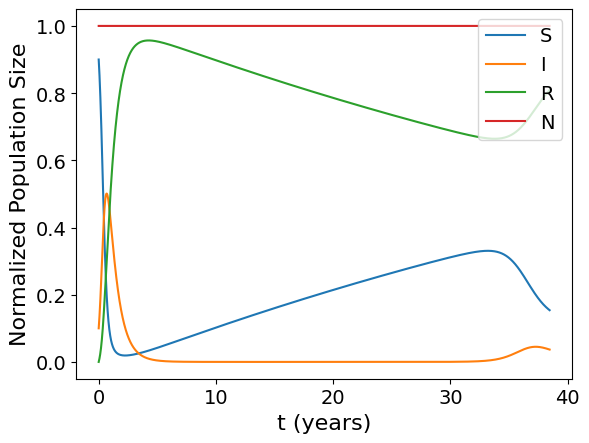

In [17]:
R0 = 5
delta = 1. / (75*52)
gamma = 100*delta
epsilon = 0.0
alpha = delta
beta = R0 * delta * (gamma + delta + epsilon) / alpha

t = np.linspace(0, 2000, 40001)

u = odeint(SIR_Full, [.9, .1, 0], t, args=(alpha, beta, gamma, delta, epsilon))

fig, ax = plt.subplots()
ax.plot(t/52., u[:,0], color='C0', label="S")
ax.plot(t/52., u[:,1], color='C1', label="I")
ax.plot(t/52., u[:,2], color='C2', label="R")
ax.plot(t/52., np.sum(u, axis=1), color='C3', label="N")
ax.legend(fontsize=14, loc="upper right")
ax.set_xlabel("t (years)", fontsize=16)
ax.set_ylabel("Normalized Population Size", fontsize=16)
ax.tick_params(axis='both', labelsize=14)


In [4]:
def SIR_Vaccine(u, t, alpha, beta, gamma, delta, epsilon, nu):
    S, I, R = u
    dS = alpha*(1-nu) - beta * S * I - delta * S
    dI = beta * S * I - (gamma + delta + epsilon) * I
    dR = alpha*nu + gamma * I - delta * R
    return [dS, dI, dR]

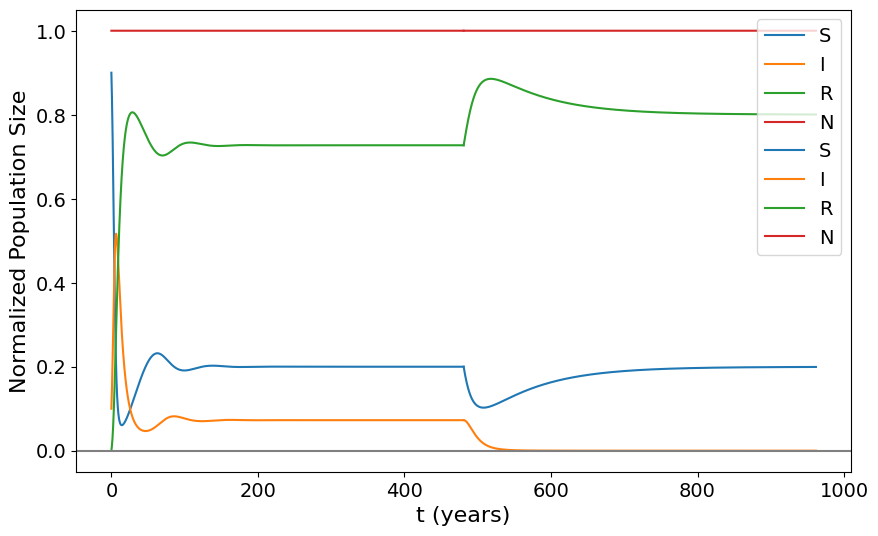

In [15]:
R0 = 5
delta = 1. / (75*52)
gamma = 10*delta
epsilon = 0.0
alpha = delta
beta = R0 * delta * (gamma + delta + epsilon) / alpha
nu = .8

t = np.linspace(0, 50000, 400001)

fig, ax = plt.subplots(figsize=(10,6))

u = odeint(SIR_Vaccine, [.9, .1, 0], t[:200000], args=(alpha, beta, gamma, delta, epsilon, 0))

ax.plot(t[:200000]/52., u[:,0], color='C0', label="S")
ax.plot(t[:200000]/52., u[:,1], color='C1', label="I")
ax.plot(t[:200000]/52., u[:,2], color='C2', label="R")
ax.plot(t[:200000]/52., np.sum(u, axis=1), color='C3', label="N")

u = odeint(SIR_Vaccine, u[-1], t[200000:], args=(alpha, beta, gamma, delta, epsilon, nu))

ax.plot(t[200000:]/52., u[:,0], color='C0', label="S")
ax.plot(t[200000:]/52., u[:,1], color='C1', label="I")
ax.plot(t[200000:]/52., u[:,2], color='C2', label="R")
ax.plot(t[200000:]/52., np.sum(u, axis=1), color='C3', label="N")

ax.axhline(y=0, color='gray')
ax.legend(fontsize=14, loc="upper right")
ax.set_xlabel("t (years)", fontsize=16)
ax.set_ylabel("Normalized Population Size", fontsize=16)
ax.tick_params(axis='both', labelsize=14)

#ax.set_ylim((0,.002))


In [39]:
def SIR_Fast(u, t, beta, gamma):
    S, I, R = u
    dS = - beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I 
    return [dS, dI, dR]

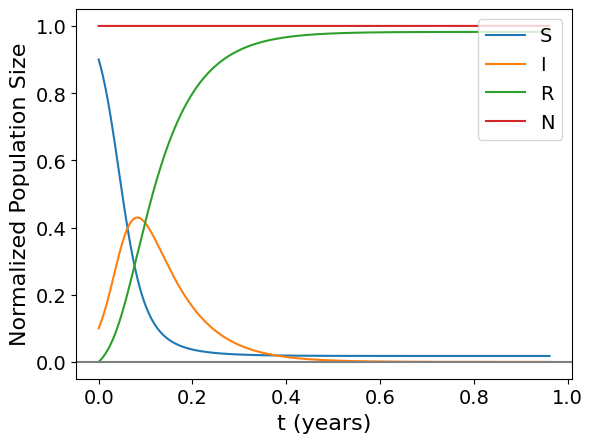

In [65]:
R0 = 4
gamma = 1000*delta
beta = R0*gamma

t = np.linspace(0, 50, 40001)

u = odeint(SIR_Fast, [.9, .1, 0], t, args=(beta, gamma))

fig, ax = plt.subplots()
ax.plot(t/52., u[:,0], color='C0', label="S")
ax.plot(t/52., u[:,1], color='C1', label="I")
ax.plot(t/52., u[:,2], color='C2', label="R")
ax.plot(t/52., np.sum(u, axis=1), color='C3', label="N")

ax.axhline(y=0, color="gray")

ax.legend(fontsize=14, loc="upper right")
ax.set_xlabel("t (years)", fontsize=16)
ax.set_ylabel("Normalized Population Size", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
